## Regresión polinomial

### a) Una única variable

##### 1) Importar librerías

In [1]:
!pip install plotly
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

##### 2) Crear los datos y visualizarlos

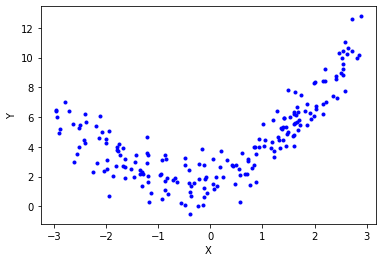

In [2]:
#Generamos los datos de entrada
X = 6 * np.random.rand(200, 1) - 3
#La ecuación que vamos a usar y que tenemos que predecir a través de regresión es: y = 0.8x^2 + 0.9x + 2
# Creamos la ecuación más ruido
y = 0.8 * X**2 + 0.9*X + 2 + np.random.randn(200, 1)
#Visualizamos los datos
plt.plot(X, y, 'b.')
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##### 3) Dividir los datos en set de entrenamiento y set de test

In [3]:
#Un 80% de los datos es de entrenamiento y el 20% restante de test
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

##### 4) Aplicamos regresión lineal

In [4]:
#Creamos variable de regresión lineal
lr = LinearRegression()
# Buscamos los parámetros óptimos del modelo
lr.fit(x_train, y_train)
#Predecimos las variables de salida
y_pred = lr.predict(x_test)

##### 5) Dibujamos los datos de entrenamiento y el modelo de regresión lineal

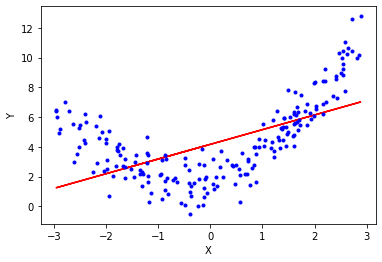

In [5]:
plt.plot(x_train, lr.predict(x_train), color="r")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##### 6) Aplicamos regresión polinomial

In [6]:
#Aplicamos regresión polinomial de 2º grado
poly = PolynomialFeatures(degree=2, include_bias=True)
x_train_trans = poly.fit_transform(x_train)
x_test_trans = poly.transform(x_test)
#include bias parameter
lr = LinearRegression()
lr.fit(x_train_trans, y_train)
y_pred = lr.predict(x_test_trans)

In [7]:
# Vemos los valores del modelo (los coeficientes de la variable dependiente y el punto de intersección)
print(lr.coef_)
print(lr.intercept_)

[[0.         0.9030007  0.82029368]]
[1.90729064]


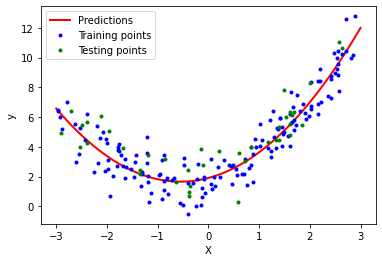

In [8]:
X_new = np.linspace(-3, 3, 200).reshape(200, 1)
X_new_poly = poly.transform(X_new)
y_new = lr.predict(X_new_poly)
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.plot(x_train, y_train, "b.",label='Training points')
plt.plot(x_test, y_test, "g.",label='Testing points')
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()

##### 7) Aplicamos SVR


C:\Users\JonB\anaconda3\lib\site-packages\sklearn\utils\validation.py:73: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(**kwargs)


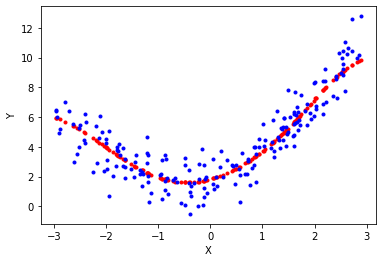

In [9]:
#Creamos variable de regresión lineal
svr = SVR()
# Buscamos los parámetros óptimos del modelo
svr.fit(x_train, y_train)
# Visualizamos el resultado del modelo entrenado
plt.plot(x_train, svr.predict(x_train), "r.")
plt.plot(X, y, "b.")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

##### 8) Comparamos los modelos de los 2 algoritmos de regresión no lineal (polinomial y SVR).

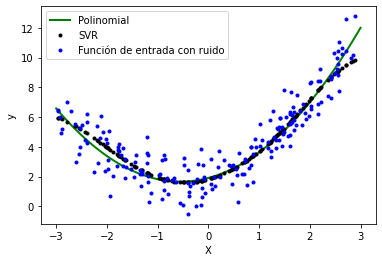

In [12]:
plt.plot(X_new, y_new, "g-", linewidth=2, label="Polinomial") # Regresión polinomial grado 2
plt.plot(x_train, svr.predict(x_train), "k.", linewidth=2, label="SVR") # SVR
plt.plot(X, y, "b.", linewidth=2, label="Función de entrada con ruido") # Datos de entrada con ruido
plt.xlabel("X")
plt.ylabel("y")
plt.legend()
plt.show()